# Assignment #3

### Importing Necessary Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
from IPython.display import Image

## Question 1

### Part A 

Consider the Randu PRNG function. Show that the produced sequence of numbers has lots of hidden symmetry. Do this by looking at the bit values the function returns.



We can start by calculating a list of random values by using the following function:

In [0]:
def prng( nsamples, seed, multval, modval):
  
  """
  
  -- General Description --

  This function will return a specified number of random values with a given initial seed. The function will produce a psuedo-random number through the use of 
  the following generalized equation:

    x_{i+1} = (t * x_i % m)

  Where x_{i+1} will be random value (and used as the next seed if we are doing more than one trial), t is the multiplication value, x_i is the initial seed
  and m is the modulus value.

  -- How it Works --

  This function works by passing the PRNG expression an intial seed. It will also assign pre-determined multiplication and modulo values into the PRNG expression. 
  It will then take the given seed and pass it through the equation. For each sample run it will use the produced 'random' value as the next seed, and the process
  will continue in a recursive fashion. Each random value/seed that is produced will be stored in a list, and will be returned to the user upon running the function.

  -- Arguments --

  nsamples = The number of times we wish to produce a random number
  seed = The initial starting value, or x_i
  multval = The multiplication value that will be placed in the general PRNG equation
  modval = The modulus value that will be placed in the general PRNG equation
  
  """
  
  # --- Calculating a List of Random Values ---
  sequence = np.zeros( nsamples, dtype=np.int32 ) # Producing a list of zeros that is the length of the number of random values we wish to produce
  sequence[0] = seed # The first entry in this list will be the seed value
  for i in range(1,nsamples): # For every value other than the seed:
      sequence[i] = multval*sequence[i-1] % modval # Using the random number generator equation on the given val
                                                     # will then store the new value in the sequence list
  
  # --- Storing Random Values in a List
  
  random_numbers = []
  for i in sequence[:]:
    random_numbers.append(i)
    
  return random_numbers

Now, the random function that was described by Park and Miller is called 'Randu'. It is defined by the following variables:

$$ x_{i+1}=(2^{16}+3)x_i\,\mbox{mod}\,2^{31}=65539x_i\,\mbox{mod}\,2^{31} $$

As such, if use these as entries in the prng function it will produce random values according to the Randu algorithm.

In [0]:
nsamples = 12 # How many trials we we will run
seed = 100
multval = 65539
modval=2**31

Now, in order for us to see patterns we need to have each element of the list be returned as bit values (as opposed to integers). As such, let us modify the prng function slightly:

In [0]:
def prng_bitifier( nsamples, seed, multval, modval):
  
  """
  
  -- General Description --

  This function will return a specified number of random values (in bit notation)with a given initial seed. The function will produce a psuedo-random number 
  through the use of the following generalized equation:

    x_{i+1} = (t * x_i % m)

  Where x_{i+1} will be random value (and used as the next seed if we are doing more than one trial), t is the multiplication value, x_i is the initial seed
  and m is the modulus value.

  -- How it Works --

  This function works by passing the PRNG expression an intial seed. It will also assign pre-determined multiplication and modulo values into the PRNG expression. 
  It will then take the given seed and pass it through the equation. For each sample run it will use the produced 'random' value as the next seed, and the process
  will continue in a recursive fashion. Each random value/seed that is produced will be stored in a list, and will be returned to the user upon running the function.
  The extra step for the bitifier function is to reformat each value in a bit sequence, this is important as it will allow the user to hunt for patterns in their 
  defined PRNG function.

  -- Arguments --

  nsamples = The number of times we wish to produce a random number
  seed = The initial starting value, or x_i
  multval = The multiplication value that will be placed in the general PRNG equation
  modval = The modulus value that will be placed in the general PRNG equation
  
  """
  
  # --- Calculating random values ---
  sequence = np.zeros( nsamples, dtype=np.int32 ) # Producing a list of zeros that is the length of the number of random values we wish to produce
  sequence[0] = seed # The first entry in this list will be the seed value
  for i in range(1,nsamples): # For every value other than the seed:
      sequence[i] = multval*sequence[i-1] % modval # Using the random number generator equation on the given val
                                                     # will then store the new value in the sequence list
        
  # --- Converting Random Ints to Binary ---
  
  binary_vals = []
  for i in sequence[:]: # Running through each value in the list and determining the binary value for each element
    binary_vals.append( format(i , '032b') ) # Calculating the binary value with associated padding and appending them to our values list
 
  return binary_vals

In [0]:
prng_bitifier( nsamples, seed, multval, modval)

['00000000000000000000000001100100',
 '00000000011001000000000100101100',
 '00000010010110000000001110000100',
 '00001010100011000000101010001100',
 '00101010001100000001111110100100',
 '00011110001101000101111011101100',
 '00111001100010010001110011000100',
 '01001001010111110101011001001100',
 '00110010011010100000001011100100',
 '00011010001000100000100010101100',
 '01010111000100100001101000000100',
 '00011111001110100100111000001100']

As we can see, there are clear and discernable trends in each column of the binary numbers. I.e the far right column is all zeros. The next column is also all zeros. The next is 1's, and so on and so forth. To get a better visualization of whats going on, lets plot the various "columns" that we see.

In [0]:
def pattern_extractor( binary_list, col , result ):
  
  """

  -- General Description --

  Clearly the bit sequence for the Randu PRNG has a pattern in the columns of the various bitstrings. This function aims to highlight this pattern by retrieving
  the values in each column so that they may be plotted against their entry number.

  -- How it Works --

  This function works by first taking a list of bit string entries. It will then store information in two lists; the column_list will be the column corresponding
  to values in the column_entry_list, where the column_entry_list contains all values that are in the bit strings. The reason we want to extract the data in this fashion
  is so that we can plot the respective column values as a function of the row number. This will highlight the non-random patterns amongst the various bitstrings.
  
  -- Arguments --
  
  binary_list = The list of PRNG bit-strings that the user wishes to plot
  col = The index for the bit value you wish to plot (i.e the column value)
  result = The output value you wish to return upon running the function (1 == The column value for which you are extracting the data, 2 == The columns entry)
  """
  
  vals = binary_list
  column_list = []
  column_entry_list = []
  val = 1
  
  for i in vals:
    column_list.append(val)
    column_entry_list.append(i[col]) # Appending the column value into a master list
    val += 1
    
  if result == 1:
    return column_list
  
  if result == 2:
    return column_entry_list

In [0]:
nsamples = 25 # How many trials we we will run
seed = 100
multval = 65539
modval=2**31

# Let us just generate the list of bitstrings that we wish to plot
results = prng_bitifier( nsamples, seed, multval, modval)

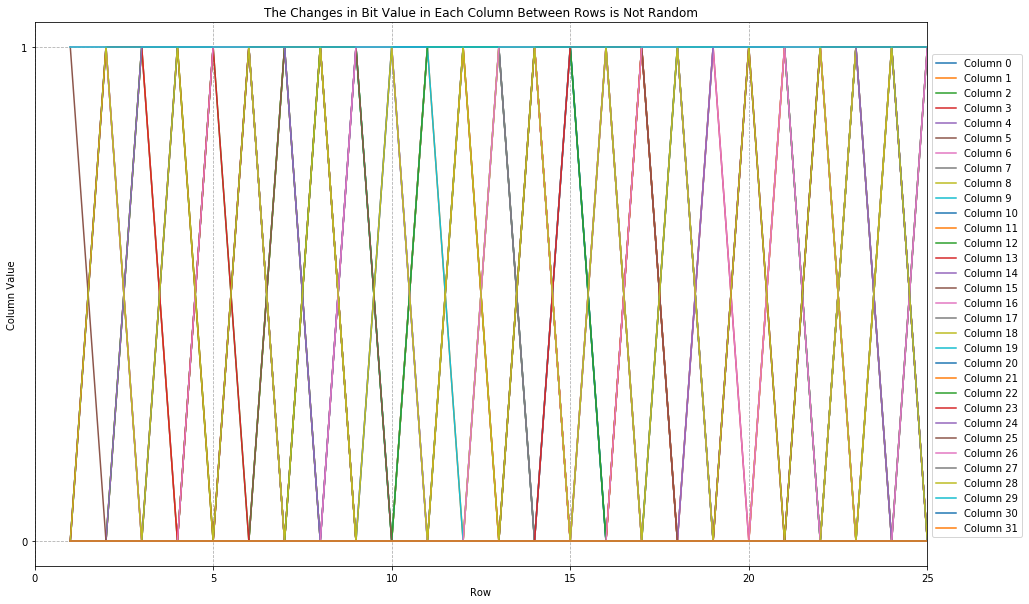

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))

plt.xlabel('Row')
plt.ylabel('Column Value')
plt.title('The Changes in Bit Value in Each Column Between Rows is Not Random')
plt.grid(linestyle='dashed')
plt.xlim(0,25) # Limiting x-axis to within the defined N values

#Plotting Values 
for i in range(32):
  plt.plot(pattern_extractor(results,i,1),pattern_extractor(results,i,2,) , label = 'Column ' + str(i)) # Plotting values of N against r in a scatter plot


# Legend Settings
legend = plt.legend( bbox_to_anchor=(1.0, 0.95))
frame = legend.get_frame()
frame.set_alpha(0.8)

As we can see, there is a clear and definitive pattern in the column values. If the PRNG were mostly random we would not see the above pattern, but rather, we would see a random criss-crossing of lines.

### Part B

Consider the following PRNG:

$$ x_{i+1}=\left(9806x_i+1\right)\,\mbox{mod}\,\left(2^{17}-1\right) $$

Show that this particlar PRNG samples integers uniformly; but for one choice of seed the output repeats forever. Find that particular seend value.

Because our initial seed is not 

*   List item
*   List item

simply multiplied by a given value (multval) but also has a +1 term, we must define a new function that accounts for this. 

In [0]:
def prng2( nsamples, seed, multval, modval):
  
  """
  
  -- General Description --

  This function works in the exact same manner as the previous PRNG function, but it accounts for the variations in the new PRNG equation.

  -- How it works --

  Please see the original prng function for a full description.
  
  """
  
  # --- Calculating a List of Random Values ---
  sequence = np.zeros( nsamples, dtype=np.int32 ) # Producing a list of zeros that is the length of the number of random values we wish to produce
  sequence[0] = seed # The first entry in this list will be the seed value
  for i in range(1,nsamples): # For every value other than the seed:
      sequence[i] = (multval*sequence[i-1] + 1) % modval # Using the random number generator equation on the given val
                                                     # will then store the new value in the sequence list
  
  # --- Storing Random Values in a List
  
  random_numbers = []
  for i in sequence[:]:
    random_numbers.append(i)
    
  return random_numbers

Now, allow us to see if we ever run into a situation where a given seed, say s,returns the same value continuously. This has been indicated as being the result of a 'bad' seed; so lets see if this claim is true! To do this, let us generate a function that tests the various seed values. If a the same 'random' number occurs twice then we have found our faulty seed.

In [0]:
def faulty_seed_hunter( n_samples , n_seeds , result):
  
  """
  
  -- General Description/How it Works --

  The faulty seed hunter will run through various starting seed values over a specified number of steps. It will attempt to discern if their is a faulty seed
  by checking to see if the values in a given list are equivalent. Equivalent 'randomized' values indicates that the PRNG function has been broken, we will thereby
  return that initial seed as it is the culprit.
  
  -- Arguments --
  
  n_samples = How many times we will run a given seed in the recursive function to check for repeated values
  n_seeds = The number of seeds we wish to try
  result = The data we wish to output. (result == 1: returns a print statement with faulty seed value, result == 2: returns the faulty seed value as an int )

  """
  
  # --- Standardized Values ---
  
  multval = 9806
  modval = (2**17)-1
  
  # --- Determining if Same Value is Returned ---
  
  special_value = []
  
  for i in range(n_seeds): # For each seed value we will check the random numbers being outputted
    seed_values = prng2( n_samples, i, multval , modval) # A list of random values for each seed
    if seed_values[-1] == seed_values[-2] == seed_values[-3]:
      special_value.append(seed_values[-1])
  
  if result == 1:
    print('The bad seed value is:' , special_value[0])
    
  if result == 2: 
    return special_value[0]
  

In [0]:
faulty_seed_hunter(100, 38000,1)

The bad seed value is: 37911


To show that this described function samples uniformly, apart from the single bad seed value, let us examine the following plots:

In [0]:
# A slightly modified version of the pprng2 function that will normalize output values for better plotting!
def pprng( nsamples, seed, multval, modval, scale):
    sequence = np.zeros( nsamples, dtype=np.int32 )
    sequence[0] = seed
    for i in range(1,nsamples):
        sequence[i] = ((multval*sequence[i-1])+1) % modval
    
    if scale:
        sequence = sequence / np.double(modval)
  
    return sequence

Text(0.5, 0.92, 'hyperplanes')

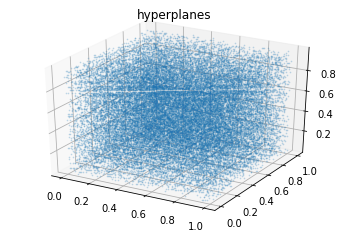

In [0]:
nsamples=10**6
seed=20 
multval=9806
modval=131071
scale=True

PPRNG = pprng(nsamples, seed, multval, modval, scale)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
nn = 10**5
#xx, yy, zz = x[0:6000].reshape(3,-1)
xx, yy, zz = PPRNG[0:nn-3:3], PPRNG[1:nn-2:3], PPRNG[2:nn-1:3]
# interleave data and plot in 3D
plt.plot( xx,yy,zz, '.', ms=1.5, alpha=0.2)
plt.title('hyperplanes')

Text(0.5, 1.0, 'slice for z>0.9')

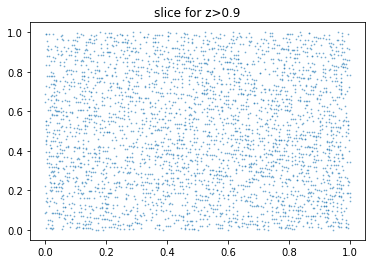

In [0]:
plt.plot( xx[zz>0.9], yy[zz>0.9], '.', ms=1.5, alpha=0.5)
plt.title('slice for z>0.9')

Text(0.5, 1.0, 'slice for y>0.9')

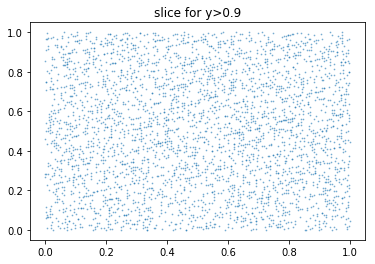

In [0]:
plt.plot( xx[yy>0.9], zz[yy>0.9], '.', ms=1.5, alpha=0.5)
plt.title('slice for y>0.9')

Text(0.5, 1.0, 'slice for x>0.9')

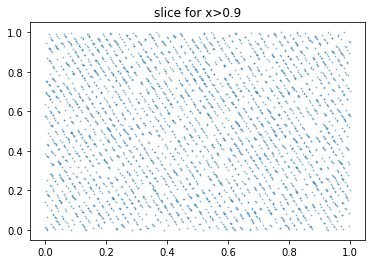

In [0]:
plt.plot( yy[xx>0.9], zz[xx>0.9], '.', ms=1.5, alpha=0.5)
plt.title('slice for x>0.9')

Looking at the 3-D plot, the number distribution looks completely random. The X, Y and Z plane slices look will distributed but there is an obvious diagonal pattern in each of them. This shows there is symmetry but it is worth noting the diagonal 'lines' are very thin and actually ends up yielding a fairly uniform distribution of pseudo-random numbers. But what about the bad seed?

If we plot the faulty seed over 100 intervals we would find the following:

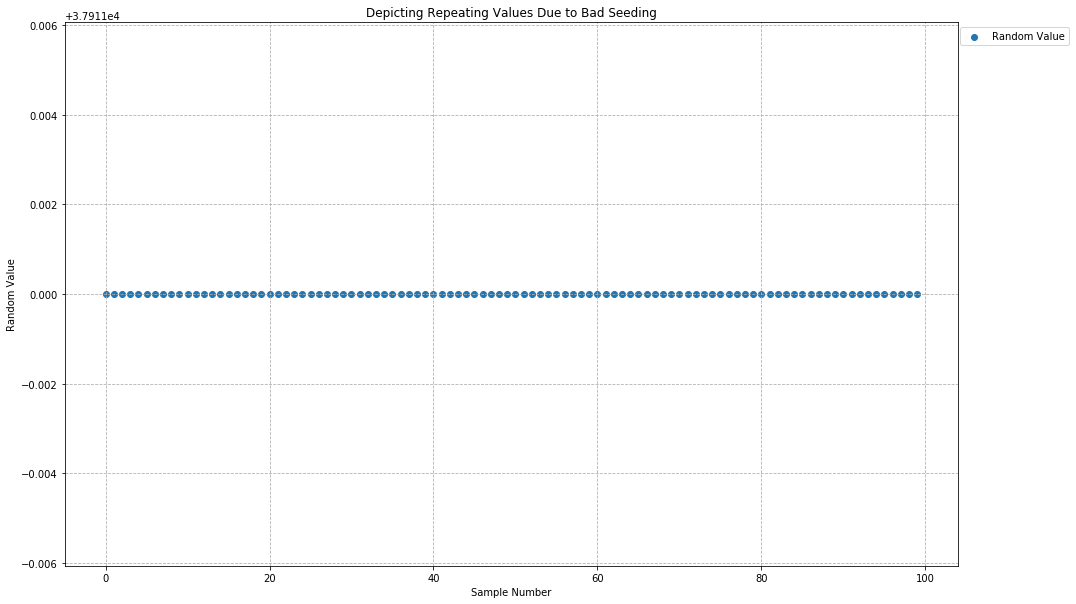

In [0]:
# Plotting Labels
plt.figure(figsize=(16,10))

plt.xlabel('Sample Number')
plt.ylabel('Random Value')
plt.title('Depicting Repeating Values Due to Bad Seeding')
plt.grid(linestyle='dashed')
#plt.xlim(0,25) # Limiting x-axis to within the defined N values

# --- Calculating and Storing Values ---

nsamples = 100
seed = faulty_seed_hunter(100, 38000,2) # Using the discoveed faulty seed
multval = 9806 
modval = (2**17)-1

sample_number = []
random_vals = prng2( nsamples, seed, multval, modval)

for i in range(nsamples): # Calculating n numbers of 'random' integers
  sample_number.append(i)


plt.scatter(sample_number, random_vals , label = 'Random Value') # Plotting values of N against r in a scatter plot


# Legend Settings
legend = plt.legend( bbox_to_anchor=(1.13, 1.00))
frame = legend.get_frame()
frame.set_alpha(0.8)

Clearly, the initial seed value 37,911 causes a breakdown of the function as it continuously returns the same value.

## Question 2

Let us start by defining our riffle function:

In [0]:
def riffle_shuffle(deck, split):
  
  """
  
  -- General Description --

  This function attempts to perform a pseudo-random riffle shuffle.
  
  """
  
  # --- Splitting the Deck at the Prescribed Point ---
  
  deck1 = deck[:-split]
  deck2 = deck[-split:]

  deck4 = []
  
  # --- Perfoming the Riffle Shuffle ---
  
  size = 52 # Size of the deck
  
  for j in range(split):
    deck3 = deck1[ j*int((size-split)/split):(j+1)*int((size-split)/split) ]
    deck3 += [deck2[j]]
    deck4 += deck3

  deck4 += deck1[(j+1)*int((size-split)/split):size+1]
  
  return(deck4)

In [0]:
deck=[i for i in range(1,52+1)]
indices = np.random.randint(1,52,7)# for indx in range(10, 26, 4):

for indx in indices:
  deck=riffle_shuffle(deck,indx)
print("\n",deck)


 [33, 8, 34, 9, 35, 10, 36, 49, 11, 37, 12, 38, 13, 39, 14, 40, 15, 41, 16, 42, 17, 43, 18, 44, 19, 45, 20, 46, 21, 47, 22, 48, 23, 24, 50, 25, 51, 26, 52, 1, 27, 2, 28, 3, 29, 4, 30, 5, 31, 6, 32, 7]


Now, allow us to go ahead and shuffle the deck 7 times for N sessions (where N is very large, we will decide that later). The reason that we want to do this is so that we can estimate the how 'random' the shuffling algorithm really is. We would expect that if it was completely random each card would have a 1/52 chance of being in a particular element of the list. As such, to get some proper statistics as to what the true values are we must first determine the probability of a particular card being found in a particular element. Let us start by creating a function that will do 7 shuffles (each with a random deck split) over N sessions.

In [0]:
def ultimate_shuffle(N):
  
  """
  
  -- General Description --
  
  The purpose of this function is to perform a riffle shuffle 7 times (with a random split each time), for N number of sessions. The purpose in performing the random
  shuffle 7 times for N sessiosn is to retrieve statistics on how the deck performs. This will be used in determining an entropy for the deck in estimating how randomized
  the function truly is.

  -- Arguments --
  
  N = The number of times we wish to perform a 7x riffle shuffle

  """
  
  # --- Suffling 7 Times Over N Cycles ---
  
  master_deck = []
  deck = [ i for i in range(1,53)]
  
  for i in range(N):# Performing N cycles of 7 shuffles
    
    vals = np.random.randint(1,52,7) # note that I only need to consider splits <= 26, as right becomes left if the condition is reversed.
    deck = [ i for i in range(1,53)]
    
    for indx in vals: # Randomly splitting the deck for every shuffle (the total being 7 times)
      deck = riffle_shuffle(deck,indx)
    master_deck.append(deck)
    
  # --- Turning Lists of Lists into Elements ---
  
  master_deck_adjusted = []
  
  for sublist in master_deck: # For each element in the master list (i.e each 7x shuffled deck list)
    for item in sublist: # For each element in that particular deck append the item to a new master deck
      master_deck_adjusted.append(item)
  
  return master_deck_adjusted

Now that we have designed a function that will give us some proper stats on the riffle shuffle function, we now need to determine how well the riffle shuffle is perform. Ideally, it would be perfectly random; but chances are this is not the case! As such, we will measure the disorder or shannon entropy in each element of the deck (i.e what is the shannon entropy in the first element, and the second and so on and so forth).

First, let us test the ultimate shuffle to see if it returns the results we expect. To start, allow me to to print the first 4 elements of our deck. That is, after every 7 shuffles, what card is in the 1st spot in our deck, the 2nd spot, the 3rd spot and so on. Printing these values we find:

In [0]:
# Here I am testing np.unique to return unique entries in a list along with the number of times they have occured

for i in range(0,4): # Checking each element in the deck of cards
  element_list = ultimate_shuffle(3)[i::52] # The cards that have been appended to each element
  print( element_list )

[14, 35, 14]
[16, 7, 41]
[39, 43, 9]
[39, 20, 42]


Looks good, lets go ahead and calculate our entropy.

In [0]:
#Testing comparing the values of the card in each element

def shannon_calculator(N):
  
  """
  
  -- General Description --
  
  This function determines the entropy for each place in the deck. It will give inferences into how properly the deck is randomized.
  
  -- Arguments --
  
  N = The number of times we produced 7 randomized decks
  
  """
  
  # -- Calculating Shannon Entropy for Each Element --
  
  for i in range(52): # Checking each element in the deck of cards
    element_list = ultimate_shuffle(N)[i::52] # The cards that have been appended to each element
    unique_vals = np.unique( element_list , return_counts = True )
    prob_vals = unique_vals[1] / N

    s_entropy = 0
    for p in prob_vals:
      s_entropy += (-1)*p*np.log2(p)
    print("Entropy for Element", i , "is Given By:", round(s_entropy,2))
    
  return

In [0]:
shannon_calculator(2000)

Entropy for Element 0 is Given By: 5.68
Entropy for Element 1 is Given By: 5.68
Entropy for Element 2 is Given By: 5.68
Entropy for Element 3 is Given By: 5.68
Entropy for Element 4 is Given By: 5.68
Entropy for Element 5 is Given By: 5.67
Entropy for Element 6 is Given By: 5.68
Entropy for Element 7 is Given By: 5.68
Entropy for Element 8 is Given By: 5.69
Entropy for Element 9 is Given By: 5.68
Entropy for Element 10 is Given By: 5.68
Entropy for Element 11 is Given By: 5.68
Entropy for Element 12 is Given By: 5.68
Entropy for Element 13 is Given By: 5.68
Entropy for Element 14 is Given By: 5.67
Entropy for Element 15 is Given By: 5.68
Entropy for Element 16 is Given By: 5.68
Entropy for Element 17 is Given By: 5.68
Entropy for Element 18 is Given By: 5.69
Entropy for Element 19 is Given By: 5.68
Entropy for Element 20 is Given By: 5.69
Entropy for Element 21 is Given By: 5.68
Entropy for Element 22 is Given By: 5.67
Entropy for Element 23 is Given By: 5.68
Entropy for Element 24 is 

To represent 52 cards we need a minimum of 6 bits. As such, if our shuffling algorithm was completely random we would expect each value to show up an even numer of times; thereby giving us an entropy of 6. However, as you can see the entropy for each element in the list is ~ 5.68/5.69. This indicates that we are not perfectly randomized, however, we are somewhat close! I would this shuffling algorithm an A-. 

## Question 3

### Part A:

(1) Test all of the elementary CA rules for true randomness by running them for a while, as done above. (2) Examine the list of the integers, associated with the sequence of length-three bit strings, using the entropy techniques discussed in Sec. 2.4. (3) Which CA rules evenly sample over three bits? Two bits? One bit? (4) Plot the most random CA over some time interval, like was done above. Do the plots *look* random for all of these? Comment.

Let us start by testing out the code that has been given to us in the assignment. First, we can represent a "lookup" table - or the table that can be used to refer to values from, using the following information:

In [0]:
# np.uint8 turns any passed integer into an (unsigned) integer between 0-255
# i.e this is 2^8 bits
# np.unpackbits will take the passed integer and represent it as an 8-bit value

rule_number = 110 # Change me!
lookup = np.unpackbits( np.uint8(rule_number) )[::-1] # We reverse rule string for mapping purposes
print(lookup)

[0 1 1 1 0 1 1 0]


To take 'steps' from the initial fed bit-string we can follow a pre-defined mapping procedure. The code cell below highlights how this is done. Esentially what we will do is look to the integer values to the left, at and to the right of a position of interest. we will feed those value to the following mapping equation:

$$ x_i = 4(v_{i-1}) + v_i + 2(v_{i+1})$$

Where $x_i$ is our mapped (or step) element value and $v_i$ is our original element value. 

In [0]:
# We can then complete a step or 'mapping' by taking a given value and mapping it using the following:

value = np.zeros( 6 , dtype = np.int8 )
value[0:3] = 1

triple = np.roll(value,+1)*4 + value*2 + np.roll(value,-1)
print(triple)
print(lookup[triple])

[3 7 6 4 0 1]
[1 0 1 0 0 1]


As such, we can develop a function that takes a step from an initial input as the following:

In [0]:
def cellular1d_step(value, rule_number):
# Apply a 3-bit transition rule to a list of binary cell states.

    """
    
    -- General Description --

    The purpose of this function is to perform a cellular automata for a given binary rule number (from 0-256) for a given initial sequence. The manner in which
    the CA is shuffled will depend on the rule_number.

    -- Arguments --

    value = The initial list that will be shuffled based on the CA rule_number
    rule_number = The rule from 0-256 that will be used to perform the various mappings
    
    """
  
    # express rule as a binary string:
    lookup = np.unpackbits( np.uint8(rule_number) )[::-1]
    #print(lookup)

    # look only at the neighbourhood of a specific site, and express in base 2:
    triple = np.roll(value,+1)*4 + value*2 + np.roll(value,-1)
    #print(triple)
    #print(lookup[triple])
  
    return lookup[triple] , triple

Which can be modified for N number of steps (over all CA rules) as follows:

In [0]:
def n_stepper(nsteps , cell_n):

  """

  -- General Description --

  The purpose of this function is perform the CA for all 256 rules over a specified number of steps N. This means that it will perform the automated process for N
  cycles.
  
  -- Arguments --

  nsteps = The number of steps that will be performed
  cell_n = The size of the initial starting array (the CA will be performed N times on this array)

  """

  for rule in range(256):

    ncells = cell_n
    step = np.zeros( ncells , dtype = np.int8)
    step[ncells//2] = 1 # Performing floor division so there is no floating numbers

    for i in range(nsteps):
      step, triple = cellular1d_step(step,rule)
    print(triple)

And further modified for determining entropy:

In [0]:
def n_stepr_entrpy_calcr(nsteps , cell_n , print_statement ):
  
  """
  
  -- General Description --

  The purpose of this function is perform the CA over N steps; upon which the entropy of the process will be determined. Because the mapping process is NOT
  independant (unlike the card shuffle) the final CA step that we perform will have been dependent on all steps prior to it. As such, we will estimate the entropy
  by looking at the entries in the final MAPPING matrix (or the triple value). We don't want to use the final bit-string output because that will just return a list 
  of 1's and 0's.
  
  """
  
  entropy_list = []
  
  for rule in range(256):
    
    # For each rule we must restart or refresh our input values, that is what the following code is
    ncells = cell_n
    step = np.zeros( ncells , dtype = np.int8)
    step[ncells//2] = 1 # Performing floor division so there is no floating numbers
    
    for i in range(nsteps):
      
      step, triple = cellular1d_step(step,rule)
      counts = np.unique( triple , return_counts=True)
      stats = counts[1]/cell_n
    s_entropy = 0
      
    for p in stats:
      s_entropy += (-1)*p*np.log2(p)
    entropy_list.append(s_entropy)
      
    if print_statement == 1:
      print("The entropy for rule", rule , "after", nsteps ,"steps is equivalent to:", round(s_entropy,2))
      
  if print_statement == 2:
    return entropy_list

In [0]:
n_stepr_entrpy_calcr(256 , 512 , 1 )

The entropy for rule 0 after 256 steps is equivalent to: 0.0
The entropy for rule 1 after 256 steps is equivalent to: 0.1
The entropy for rule 2 after 256 steps is equivalent to: 0.06
The entropy for rule 3 after 256 steps is equivalent to: 0.08
The entropy for rule 4 after 256 steps is equivalent to: 0.06
The entropy for rule 5 after 256 steps is equivalent to: 0.1
The entropy for rule 6 after 256 steps is equivalent to: 0.08
The entropy for rule 7 after 256 steps is equivalent to: 0.0
The entropy for rule 8 after 256 steps is equivalent to: 0.0
The entropy for rule 9 after 256 steps is equivalent to: 0.17
The entropy for rule 10 after 256 steps is equivalent to: 0.06
The entropy for rule 11 after 256 steps is equivalent to: 0.08
The entropy for rule 12 after 256 steps is equivalent to: 0.06
The entropy for rule 13 after 256 steps is equivalent to: 1.54
The entropy for rule 14 after 256 steps is equivalent to: 0.08
The entropy for rule 15 after 256 steps is equivalent to: 0.06
The ent

Now, allow us to isolate for the rules that most evenly sample over three, two and one bit. We can do this by hunting for rules with a shannon entropy close to these values. As such:

In [0]:
def bit_finder(entrpy_vals):
  
  """
  
  
  """
  
  entropy = entrpy_vals

  for c,i in enumerate(entropy):
 
    if (3-i) < 0.05:
      print('Rule' , c , ' with entropy:',round(i,3), 'within tolerance of 3 bits')
    elif np.abs(2-i) < 0.005:
      print('Rule' , c , 'had an entropy:', round(i,3), 'within tolerance of 2 bits')
    elif np.abs(1-i) < 0.005:
      print('Rule' , c , 'had an entropy:',round(i,3) , 'within tolerance of 1 bit')
  return

In [0]:
bit_finder( n_stepr_entrpy_calcr(256 , 512 , 2 ) )

Rule 18 had an entropy: 1.0 within tolerance of 1 bit
Rule 22 had an entropy: 2.0 within tolerance of 2 bits
Rule 26 had an entropy: 1.0 within tolerance of 1 bit
Rule 30  with entropy: 2.993 within tolerance of 3 bits
Rule 50 had an entropy: 1.0 within tolerance of 1 bit
Rule 54 had an entropy: 2.0 within tolerance of 2 bits
Rule 58 had an entropy: 1.0 within tolerance of 1 bit
Rule 77 had an entropy: 1.0 within tolerance of 1 bit
Rule 82 had an entropy: 1.0 within tolerance of 1 bit
Rule 86  with entropy: 2.993 within tolerance of 3 bits
Rule 90 had an entropy: 1.0 within tolerance of 1 bit
Rule 114 had an entropy: 1.0 within tolerance of 1 bit
Rule 122 had an entropy: 1.0 within tolerance of 1 bit
Rule 135  with entropy: 2.994 within tolerance of 3 bits
Rule 146 had an entropy: 1.0 within tolerance of 1 bit
Rule 147 had an entropy: 2.0 within tolerance of 2 bits
Rule 149  with entropy: 2.994 within tolerance of 3 bits
Rule 154 had an entropy: 1.0 within tolerance of 1 bit
Rule 165 h

Looking through this list we can see that many of the rules have an entropy equivalent to exactly 1 or 2 bit(s). There are also 4 values close to 3 bits. As such, I will pick rule 135 (as this rule and 149 have the same value relative to 3 bits) to represent 3 bits. I will pick 2 random rules to represent 1 and 2 bits as they are all equivalent.

In [0]:
def automata1d_sequence(nsteps, ncells, rule_number, seed=None):
  
    # initialize the state to zero on all cells:
    value = np.zeros(ncells, dtype=np.int8)
  
    # set the value of the middle cell to 1:
    value[ ncells//2 ] = 1
  
    grid = np.ndarray( [nsteps, ncells], dtype=np.int8)
    for n in range(nsteps):
        value = cellular1d_step(value, rule_number=rule_number)[0]
        grid[n,:] = value
    
    return np.array( [grid] ).reshape(nsteps,ncells).astype(np.uint8)

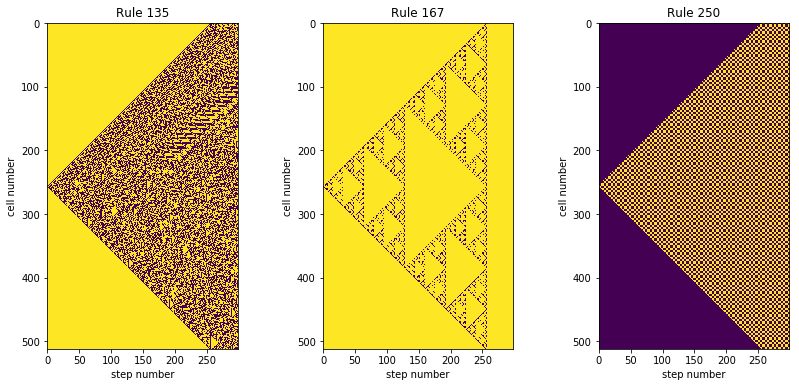

In [0]:
rules = [135 , 167 , 250]
ncells = 512
nsteps = 299
fig, axes = plt.subplots(1, len(rules), figsize=(14,6) )
for indx,rulenum in enumerate(rules):
    grid = automata1d_sequence(nsteps, ncells, rule_number=rulenum)
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+str(rulenum))

Where Rule 135 represents 3 bits, rule 167 represents 2 bits and rule 250 represents 1 bit. In the 1 and 2 bit plots there are discernable trends through the spread of integers. In the 3 bit example it appears to be fairly random, however, there are some faint trends throughout. Namely on the top edge of the triangle and near the centre portion of the triangle.

### Part 3:

#### Part 3.1:

Write a Python program to show the behaviour of totalistic code 912, and compare the output with that found at http://mathworld.wolfram.com/Code912.html.

In [0]:
def Base3_Rule_Maker( rule_number ):
  
  """
  
  -- General Description --

  The prupose of this function is to represent the given integer rule_number into a base3-string. The function also pads each value so that
  they are of equivalent length.

  -- Arguments --

  rule_number == The rule number that you wish to convert to base 3
  
  """
  # Turning the rule into base-3 expression
  lookup = np.base_repr( rule_number , base=3)[::-1] # Inverse as per the rule\
  lookup_list = np.array([],dtype=int)
  
  # Appending the binary values to an array so each element is distinct
  for i in lookup: 
    val_int = int(i)
    lookup_list = np.append(lookup_list , val_int)
    
  # Padding the list so that it is 7 bits in length
  while len(lookup_list) <= 7:
    lookup_list = np.append(lookup_list,0)
    
  return lookup_list

In [0]:
# Let us just quickly check to make that the function works

a = Base3_Rule_Maker(912)
print(a)

[0 1 2 0 2 0 1 0]


Now that we can represent our rule in Base 3, we want to create a function that will perform the CA based on the totalistic approach. The totalistic approach is similar to the binary mapping we used in the previous problem, however, here we will only summate the list entries of a specific value and the directly adjacent entries. After this function we will give a brief example of how this shuffle works.

In [0]:
def Base3_Mapping( value , lookup_value ):
  
  """
  
  -- General Description --

  The purpose of this function is to perform the CA mapping based on the totalistic algorithm. The totalistic algorithm works in base 3 for the specific rule that 
  you wish to map with. 

  -- Arguments --

  value = The original string that we wish to perform the CA mapping on
  lookup_value = The rule number that you wish to use (must be in base 3)
  """
  
  lookup = lookup_value
  #print(lookup)
  
  totalistic = np.roll(value,+1) + value + np.roll(value,-1)
  tot_array = np.array([] , dtype=int)
  for i in totalistic:
    tot_array = np.append(tot_array, int(i))
  #print(totalistic)
  
  return lookup[tot_array], tot_array

In [0]:
# checking to see that the transformation works properly for one shuffle

value = np.zeros(7)
value[len(value)//2] = 1  # initialize the input with three consecutive 1's
print("The initial sequence is given by:" , value)
rule_number = Base3_Rule_Maker(912)
value=Base3_Mapping(value,rule_number)[0]
print("After performing the totalistic CA mapping we find:",value)

The initial sequence is given by: [0. 0. 0. 1. 0. 0. 0.]
After performing the totalistic CA mapping we find: [0 0 1 1 1 0 0]


Now, allow us to make the Base3_Mapping function more autonomous. We want to  have the function perform the totalistic CA mapping for N steps. As such, we will define a function that will do exactly that (note that this function is assuming that we are only using rule 912):

In [0]:
 def Base3_Stepper(nsteps , cell_n):
  
  """
  
  -- General Description --

  The purpose of this function is to perform the totalistic CA mapping over N iterations. 

  -- Arguments --

  nsteps == The number of CA steps you wish to perform
  cell_n = The size of the initial array that CA will be performed on
  
  """

  ncells = cell_n
  step = np.zeros( ncells , dtype = np.int8)
  step[ncells//2] = 1 # Performing floor division so there is no floating numbers
  
  nrule = Base3_Rule_Maker(912) # Generating the rule that we will be using in base 3
  
  for i in range(nsteps):
    step, array = Base3_Mapping(step,nrule)
  print(step)
  
  return

Now, allow us to modify this function so that it is optimized for plotting:

In [0]:
def automata1d_sequence(nsteps, ncells, rule_number):

  """

  -- General Description --
  The purpose of this function is to perform the Base 3 totalistic CA mapping for a series of N steps. It then outputs the data in an otpimized format for plotting.
  This function will make the initial seed for us, as we will assume it to be the same as all previous examples.

  -- Arguments --

  nsteps == The number of CA steps you wish to perform
  ncells = The size of the initial array that CA will be performed on
  rule_number = The rule that we wish to use for this plot


  """
  
  # initialize the state to zero on all cells:
  value = np.zeros(ncells, dtype=np.int8)
  
  # set the value of the middle cell to 1:
  value[ ncells//2 ] = 1
  rule_number = rule_number
  grid = np.ndarray( [nsteps, ncells], dtype=np.int8)

  for n in range(nsteps):
      value, array = Base3_Mapping(value, rule_number)
      grid[n,:] = value
    
  return np.array( [grid] ).reshape(nsteps,ncells).astype(np.uint8)

Finally, allow us to plot our final result!

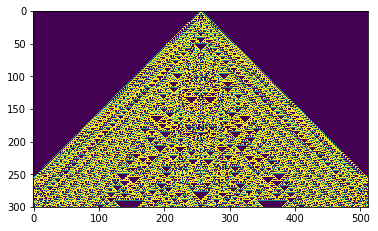

In [0]:
ncells = 512
nsteps = 300
grid = automata1d_sequence(nsteps, ncells, Base3_Rule_Maker(912))
plt.imshow(grid)

Apart from the difference in colour scheme this looks exactly like the plot showing on wolfram!

#### Part 3.2:

Now test the entropies for all 2187 possible totalistic CA (be sure to use base-3!) to find the rules with the highest entropies. Plot a few of these over some time interval.

In [0]:
def n_stepr_entrpy_calcr(nsteps , cell_n , print_statement ):
  
  """
  
  -- General Description -- 

  The purpose of this function is to determine the entropy in the CA mapping process. It follows the exact same logic as the entropy calculators
  above, so I will not go into depth about that here.

  -- Arguments --
  nsteps == The number of times we wish to perform the totalistic CA mapping
  cell_n == The size of the initial array that will be mapped
  print_statement == The values that wish to return. (print_statement == 1: return a printed list specyfying the entropy of all rules
                                                      print_statement ==2: return the raw list of entropy values, i.e no text included)
  
  """
  
  entropy_list = []
  
  for rule in range(2187):
    
    adjusted_rule = Base3_Rule_Maker(rule)
    # For each rule we must restart or refresh our input values, that is what the following code is
    ncells = cell_n
    step = np.zeros( ncells , dtype = np.int8)
    step[ncells//2] = 1 # Performing floor division so there is no floating numbers
    
    for i in range(nsteps):
      step , array = Base3_Mapping(step , adjusted_rule)
      counts = np.unique( array , return_counts=True)
      stats = counts[1]/cell_n
      
    s_entropy = 0
      
    for p in stats:
      s_entropy += (-1)*p*np.log2(p)
    entropy_list.append(s_entropy)
      
    if print_statement == 1:
      print("The entropy for rule", rule , "after", nsteps ,"steps is equivalent to:", round(s_entropy,2))
      
  if print_statement == 2:
    return entropy_list

In [0]:
n_stepr_entrpy_calcr(300 , 512 , 1 )

The entropy for rule 0 after 300 steps is equivalent to: 0.0
The entropy for rule 1 after 300 steps is equivalent to: 0.09
The entropy for rule 2 after 300 steps is equivalent to: 0.09
The entropy for rule 3 after 300 steps is equivalent to: 0.0
The entropy for rule 4 after 300 steps is equivalent to: 0.0
The entropy for rule 5 after 300 steps is equivalent to: 0.0
The entropy for rule 6 after 300 steps is equivalent to: 0.0
The entropy for rule 7 after 300 steps is equivalent to: 0.0
The entropy for rule 8 after 300 steps is equivalent to: 0.0
The entropy for rule 9 after 300 steps is equivalent to: 0.0
The entropy for rule 10 after 300 steps is equivalent to: 0.71
The entropy for rule 11 after 300 steps is equivalent to: 1.04
The entropy for rule 12 after 300 steps is equivalent to: 0.4
The entropy for rule 13 after 300 steps is equivalent to: 0.0
The entropy for rule 14 after 300 steps is equivalent to: 0.0
The entropy for rule 15 after 300 steps is equivalent to: 0.0
The entropy fo

In [0]:
entropy_list = n_stepr_entrpy_calcr(300 , 512 , 2)

Looking through our list we find that the rules with the highest entropies are: 309, 399, 714, 1544, 1562, 1563, 1715, 1784 and 1805. As such, as the final portion of this problem allow us to plot them:

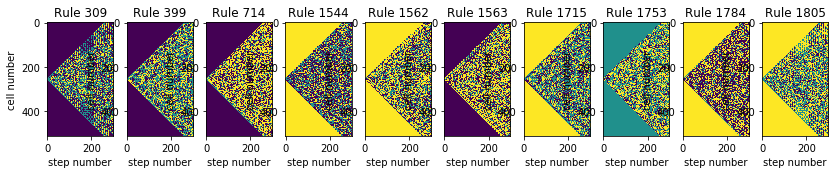

In [0]:
rules = [309 , 399 , 714 , 1544 , 1562 , 1563 , 1715 , 1753 , 1784 , 1805]
ncells = 512
nsteps = 299
fig, axes = plt.subplots(1, len(rules), figsize=(14,6) )
for indx,rulenum in enumerate(rules):
    grid = automata1d_sequence(nsteps, ncells, Base3_Rule_Maker(rulenum))
    axes[indx].imshow(grid.T)
    axes[indx].set_xlabel('step number')
    axes[indx].set_ylabel('cell number')
    axes[indx].set_title('Rule '+str(rulenum))

Apart from the discernable triangle pattern (a result of the CA mapping algorithm) we can see that the contents of the triangle appear to be 'noise based'. This good, as it indicates that their is no observable pattern using these rules.

## Bonus Question

Choose an interesting game of life rule (like not a very low-number rule). Plot the cell values (0 for white, 1 for black) on some large grid (perhaps 50 x 50 cells) for each timestep, starting with one or more black cells placed randomly over the grid. Combine these plots over several timesteps into a movie to see the evolution of the 2D totalistic cellular automaton.

The only game of life that pertained to cellular automaton we could find was Conway's Game of Life. The documentation for it is given here: https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The rules are as follows: 

The universe of the ''Game of Life'' is an infinite, two-dimensional orthogonal grid of square ''cells'', each of which is in one of two possible states, ''alive'' or ''dead'', (or ''populated'' and ''unpopulated'', respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:
* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with two or three live neighbours lives on to the next generation.
* Any live cell with more than three live neighbours dies, as if by overpopulation.
* Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.



In [0]:
def generate_data(N):
  """
  This function generates a NxN matrix filled with 0's and 1's.
  0's represent a dead cell and 1's represent a live cell.
  The distribution in the generated matrix is 80% dead, 20% alive.
  """
  a = np.zeros((N*N,), dtype=int).reshape(N,N)
  for i in range(N):
    for j in range(N):
      a[i][j] = np.random.choice([0,1], p =[0.8,0.2])
  return a

def Conways_Rules(data):
  """
  This function carries out the 4 rules of Conways Game of Life.
  It takes in a matrix and returns the matrix with the rules applied.
  """
  for i in range(len(data)): #Iterate over every element of the matrix
    for j in range(len(data[0])):
      live_count = 0
      if data[i][j] == 1: #If a cell is live
        for x in range(-1,2): #Iterate over a 9x9 area centered on a cell to explore neighbours
          for y in range(-1,2):
            try: #This is here to deal with edge cases
              if data[i+x][j+y] == 1: #Note: will account for itself as live
                live_count += 1
            except:
              pass
        if live_count < 3: #Account for the fact that our algorithm counts our live cell as well
          data[i][j] = 0
        elif live_count > 4:
          data[i][j] = 0
        else:
          data[i][j] = 1
      else: #If a cell is dead
        for x in range(-1,2):
          for y in range(-1,2):
            try:
              if data[i+x][j+y] == 1:
                live_count += 1
            except:
              pass
        if live_count == 3:
          data[i][j] = 1
        else:
          data[i][j] = 0
  return data

Now let us animate this cellular automaton. We will do this by first applying Conway's Rules to an initial dataset a few times (n_frame times), we then plot each dataset along the way and save each plot as an image. Afterwards we take each plot, in order, and generate a gif animation.

In [0]:
N = 50 #Specifies NxN size of the matrix
n_frames = 500 #Number of times to apply to rules
data = generate_data(N) #Generate the initial dataset
Conways_List = []
filenames = []
for i in range(n_frames):
  data = Conways_Rules(data)
  Conways_List.append(data)
  
  fig = plt.figure(figsize = (10,10))
  plot = plt.matshow(data)
  fname = 'Conways_List_Element_' + str(i)
  plt.savefig(fname)
  fname += '.png'
  filenames.append(fname)
  
#Generate the gif animation
images = []
for filename in filenames:
  images.append(imageio.imread(filename))
imageio.mimsave('Animation.gif', images, duration=0.2)

Output hidden; open in https://colab.research.google.com to view.

We attempted to have two animations, one N = 50, n = 500 and another N = 100, n = 2000 be displayed within the notebook but this proved difficult so we have simply submitted the gif files seperately into the dropbox.